<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="200" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

<p style="text-align: center;"><img src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="600" height="150" class="img-fluid" alt="CLRSWY_LOGO"></p>
<p style="text-align: center;"><img src="https://i.ibb.co/XS0bxSH/best-bootcamps.png" width="400" height="130" class="img-fluid" alt="CLRSWY_LOGO"></p>
<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<h1><p style="text-align: center;">Traffic Police Stops<br>Part - 4</p><h1> - Analyzing The Effect Of Weather on Policing <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``. See first 5 rows and get the shape
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
weather = pd.read_csv('weather.csv')

In [115]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
weather.shape

(8022, 26)

In [117]:
temperature_columns = ['TMIN', 'TAVG', 'TMAX']
weather[temperature_columns].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


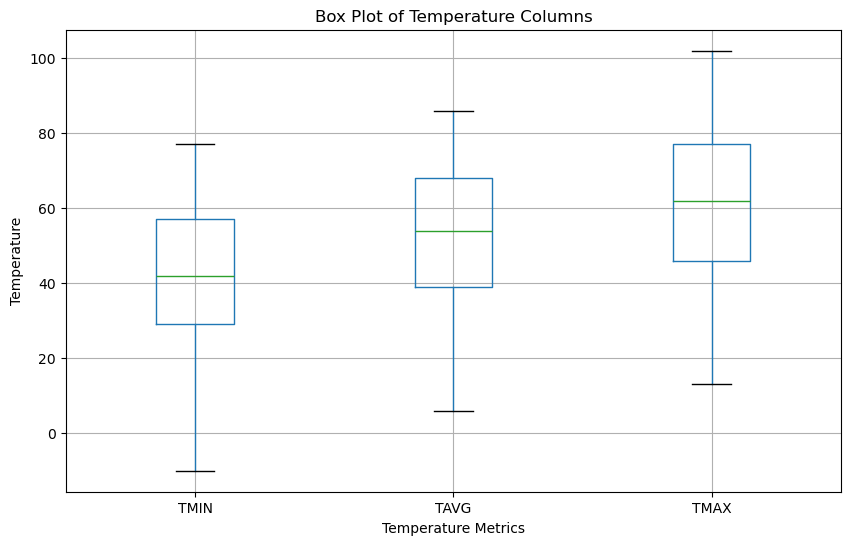

In [118]:
plt.figure(figsize=(10, 6))
weather[temperature_columns].boxplot()
plt.title('Box Plot of Temperature Columns')
plt.ylabel('Temperature')
plt.xlabel('Temperature Metrics');


***

## Plotting the temperature difference

weather['Temp_Diff'] = weather['TMAX'] - weather['TMIN']

plt.figure(figsize=(10, 6))
plt.hist(weather['TMAX'] - weather['TMIN'], bins=20, edgecolor='black')
plt.title('Histogram of Temperature Difference (TMAX - TMIN)')
plt.xlabel('Temperature Difference')
plt.ylabel('Frequency')
plt.show()

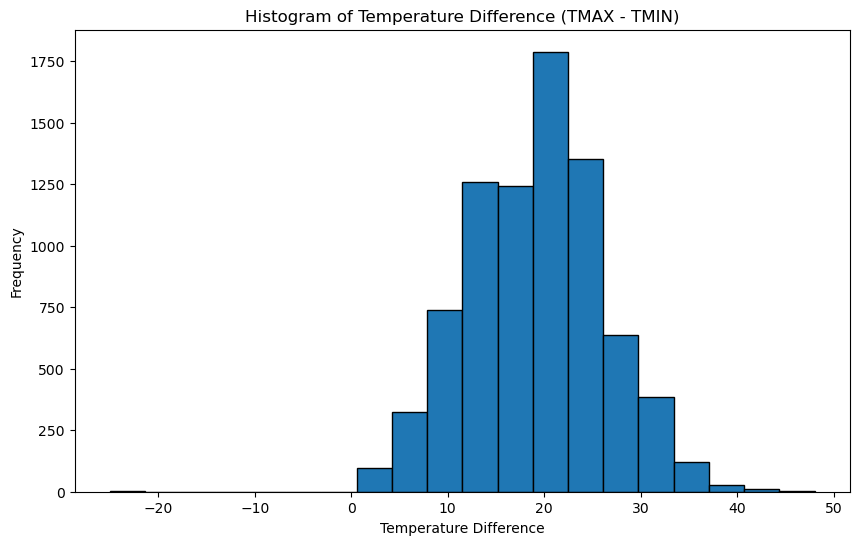

In [119]:
plt.figure(figsize=(10, 6))
plt.hist(weather['TMAX'] - weather['TMIN'], bins=20, edgecolor='black')
plt.title('Histogram of Temperature Difference (TMAX - TMIN)')
plt.xlabel('Temperature Difference')
plt.ylabel('Frequency')
plt.show()

In [120]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

In [121]:
negative_diff = weather[weather['TDIFF'] < 0]
if not negative_diff.empty:
    print("Negatif sıcaklık farkları tespit edildi:")
    print(negative_diff)
else:
    print("Negatif sıcaklık farkı yok.")

Negatif sıcaklık farkları tespit edildi:
          STATION        DATE  AWND  TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  \
1201  USC00379423  2008-04-26   NaN   NaN  51.0  76.0   NaN   NaN   NaN   NaN   

      ...  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  TDIFF  
1201  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -25.0  

[1 rows x 27 columns]


**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [122]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [123]:
weather.TDIFF.describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

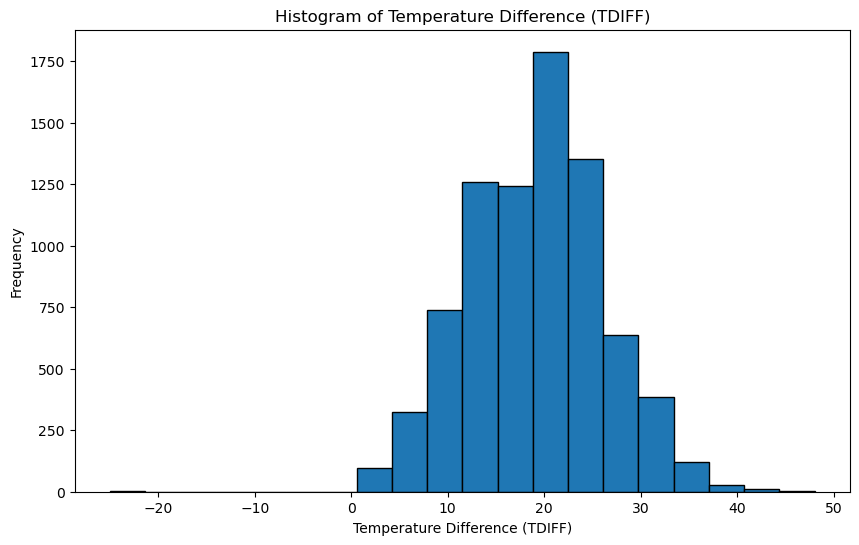

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(weather['TDIFF'], bins=20, edgecolor='black')
plt.title('Histogram of Temperature Difference (TDIFF)')
plt.xlabel('Temperature Difference (TDIFF)')
plt.ylabel('Frequency')
plt.show()

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [125]:
WT_columns = [col for col in weather.columns if col.startswith('WT')]
WT = weather[WT_columns]

In [126]:
weather['bad_conditions'] = WT.sum(axis=1)

In [127]:
weather['bad_conditions'] = weather.bad_conditions.fillna(value = 0)

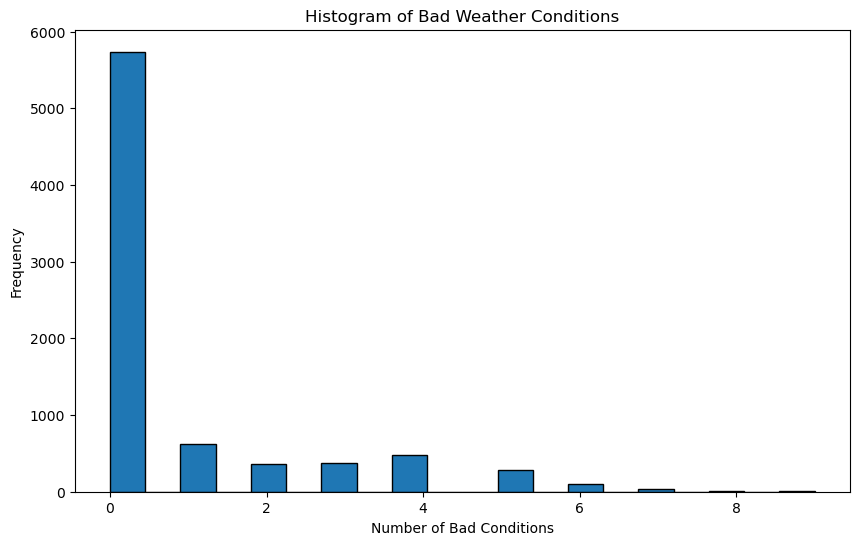

In [128]:
plt.figure(figsize=(10, 6))
plt.hist(weather['bad_conditions'], bins=20, edgecolor='black')
plt.title('Histogram of Bad Weather Conditions')
plt.xlabel('Number of Bad Conditions')
plt.ylabel('Frequency')
plt.show()

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [129]:
bad_conditions_count = weather['bad_conditions'].value_counts().sort_index()

In [130]:

mapping = {
    0: 'good',
    1: 'bad',
    2: 'bad',
    3: 'bad',
    4: 'bad',
    5: 'worse',
    6: 'worse',
    7: 'worse',
    8: 'worse',
    9: 'worse'
}

weather['rating'] = weather['bad_conditions'].map(mapping)


In [131]:

rating_counts = weather['rating'].value_counts()

rating_counts

rating
good     5738
bad      1852
worse     432
Name: count, dtype: int64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [148]:
weather['rating'].dtype

CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=True, categories_dtype=object)

In [132]:
cats = ['good', 'bad', 'worse']

weather['rating'] = pd.Categorical(weather['rating'], categories=cats, ordered=True)

weather['rating'].head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [133]:
weather.rating.value_counts()

rating
good     5738
bad      1852
worse     432
Name: count, dtype: int64

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [71]:
ri = pd.read_csv('RI_cleaned.csv')

C:\Users\nurda\AppData\Local\Temp\ipykernel_924\656149689.py:1: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv('RI_cleaned.csv')


***

In [72]:
ri

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509676,RI-NA-06,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509677,RI-NA-07,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509678,RI-NA-08,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509679,RI-NA-09,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA


In [73]:
ri = pd.read_csv('RI_cleaned.csv')
drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri.is_arrested.astype('bool')
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)
ri.head()

C:\Users\nurda\AppData\Local\Temp\ipykernel_924\4212977390.py:1: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv('RI_cleaned.csv')


,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [74]:
ri.reset_index(inplace=True)

In [75]:
ri.shape

(480584, 23)

In [136]:
weather['DATE']

0       2005-01-01
1       2005-01-02
2       2005-01-03
3       2005-01-04
4       2005-01-05
           ...    
8017    2015-12-27
8018    2015-12-28
8019    2015-12-29
8020    2015-12-30
8021    2015-12-31
Name: DATE, Length: 8022, dtype: object

In [137]:
weather['rating']

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, Length: 8022, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [66]:
weather_rating = weather[['DATE','rating']]
weather_rating

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good
...,...,...
8017,2015-12-27,bad
8018,2015-12-28,good
8019,2015-12-29,bad
8020,2015-12-30,bad


## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_datetime`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [105]:
ri.shape

(480584, 23)

In [106]:
weather.shape

(8022, 29)

In [107]:
ri_weather = pd.merge(left = ri, right = weather_rating, left_on = "stop_date", right_on = "DATE", how = "left")

In [108]:
ri_weather.shape

(959952, 25)

In [109]:
ri_weather.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good
1,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,bad
2,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,good
3,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,bad
4,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,good


In [110]:
ri_weather.set_index('stop_datetime', inplace=True)

In [111]:
ri_weather.rating.value_counts()

rating
good     699559
bad      218421
worse     41972
Name: count, dtype: int64

In [112]:
 ri_weather.groupby('rating')['violation_raw'].value_counts(normalize=True).unstack()

C:\Users\nurda\AppData\Local\Temp\ipykernel_924\4214750799.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ri_weather.groupby('rating')['violation_raw'].value_counts(normalize=True).unstack()


violation_raw,APB,Call for Service,Equipment/Inspection Violation,Motorist Assist/Courtesy,Other Traffic Violation,Registration Violation,Seatbelt Violation,Special Detail/Directed Patrol,Speeding,Suspicious Person,Violation of City/Town Ordinance,Warrant
rating,,,,,,,,,,,,
good,0.001029,0.015437,0.128477,0.002020,0.186419,0.041336,0.037828,0.027251,0.557111,0.000712,0.002133,0.000247
bad,0.000952,0.016294,0.131247,0.002051,0.191625,0.041269,0.028143,0.026888,0.558403,0.000705,0.002202,0.000220
worse,0.001024,0.020013,0.093157,0.002716,0.189841,0.041289,0.000548,0.055299,0.592776,0.000786,0.002311,0.000238


***

In [ ]:
outcome_weather = ri_weather.groupby('rating')['stop_outcome'].value_counts(normalize=True).unstack()
print(outcome_weather)

In [ ]:
# Hava durumuna göre araç arama oranlarını inceleyelim
search_conducted_weather = ri_weather.groupby('rating')['search_conducted'].mean()
print(search_conducted_weather)

# Hava durumuna göre kontraband bulunma oranlarını inceleyelim
contraband_found_weather = ri_weather.groupby('rating')['contraband_found'].mean()
print(contraband_found_weather)

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [144]:
overall_arrest_rate = ri_weather['is_arrested'].mean()
overall_arrest_rate

0.0345715202426788

In [145]:
weather_arrest_rates = ri_weather.groupby('rating')['is_arrested'].mean()
weather_arrest_rates

C:\Users\nurda\AppData\Local\Temp\ipykernel_924\2280322678.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_arrest_rates = ri_weather.groupby('rating')['is_arrested'].mean()


rating
good     0.034080
bad      0.035226
worse    0.039360
Name: is_arrested, dtype: float64

***

In [165]:
ri_weather.groupby(['rating', 'violation'])['is_arrested'].mean()


C:\Users\nurda\AppData\Local\Temp\ipykernel_924\51342113.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ri_weather.groupby(['rating', 'violation'])['is_arrested'].mean()


rating  violation          
good    Equipment              0.059125
        Moving violation       0.056805
        Other                  0.080682
        Registration/plates    0.083238
        Seat belt              0.026339
        Speeding               0.013494
bad     Equipment              0.059581
        Moving violation       0.058081
        Other                  0.084950
        Registration/plates    0.092634
        Seat belt              0.028795
        Speeding               0.013348
worse   Equipment              0.094373
        Moving violation       0.062249
        Other                  0.058704
        Registration/plates    0.098673
        Seat belt              0.000000
        Speeding               0.016600
Name: is_arrested, dtype: float64

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [175]:
arrest_rates = ri_weather.groupby(['violation', 'rating'])['is_arrested'].mean()

C:\Users\nurda\AppData\Local\Temp\ipykernel_924\1298911409.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrest_rates = ri_weather.groupby(['violation', 'rating'])['is_arrested'].mean()


In [176]:
print("Arrest Rates by Rating and Violation Type:\n\n", arrest_rates)

Arrest Rates by Rating and Violation Type:

 violation            rating
Equipment            good      0.059125
                     bad       0.059581
                     worse     0.094373
Moving violation     good      0.056805
                     bad       0.058081
                     worse     0.062249
Other                good      0.080682
                     bad       0.084950
                     worse     0.058704
Registration/plates  good      0.083238
                     bad       0.092634
                     worse     0.098673
Seat belt            good      0.026339
                     bad       0.028795
                     worse     0.000000
Speeding             good      0.013494
                     bad       0.013348
                     worse     0.016600
Name: is_arrested, dtype: float64


In [177]:
ri[ri["violation"]=="Moving violation"].is_arrested.mean()

0.0572882032185131

In [178]:
ri[ri["violation"]=="Speeding"].is_arrested.mean()

0.01359698737794713

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [179]:
arrest_rates.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.059125,0.059581,0.094373
Moving violation,0.056805,0.058081,0.062249
Other,0.080682,0.084950,0.058704
Registration/plates,0.083238,0.092634,0.098673
Seat belt,0.026339,0.028795,0.000000
Speeding,0.013494,0.013348,0.016600


In [181]:
pivot_table_ri_weather = ri_weather.pivot_table(index='rating', columns='violation', values='is_arrested', aggfunc='mean').reindex(['good', 'bad', 'worse'])

In [182]:
pivot_table_ri_weather 

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,0.059125,0.056805,0.080682,0.083238,0.026339,0.013494
bad,0.059581,0.058081,0.084950,0.092634,0.028795,0.013348
worse,0.094373,0.062249,0.058704,0.098673,0.000000,0.016600
